In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load data
df = pd.read_csv("output/attack.csv")

In [10]:
from deckard.layers.compile import clean_data_for_plotting
import yaml

with open("conf/compile.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
print(config.keys())
def_gen_dict = config["defences"]
atk_gen_dict = config["attacks"]
control_dict = config["params"]

df = clean_data_for_plotting(df, def_gen_dict, atk_gen_dict, control_dict)
attack_results = df.dropna(subset=["accuracy", "adv_accuracy"])

dict_keys(['attacks', 'defences', 'params'])


/tmp/ipykernel_3723846/651469242.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_results['Kernel'] = attack_results['model.init.kwargs.kernel']


In [11]:
fig, ax = plt.subplots(2, 2)
graph5 = sns.lineplot(
    x="attack.init.kwargs.eps",
    y="accuracy",
    data=attack_results,
    style="model.init.kwargs.kernel",
    ax=ax[0, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph5.set(xscale="log", xlabel="Perturbation Distance", ylabel="Accuracy")
graph6 = sns.lineplot(
    x="attack.init.kwargs.eps_step",
    y="accuracy",
    data=attack_results,
    style="model.init.kwargs.kernel",
    ax=ax[0, 1],
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph6.set(xscale="log", xlabel="Perturbation Step", ylabel="Accuracy")
graph7 = sns.lineplot(
    x="attack.init.kwargs.max_iter",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 0],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph7.set(xscale="log", xlabel="Maximum Iterations", ylabel="Accuracy")
graph8 = sns.lineplot(
    x="attack.init.kwargs.batch_size",
    y="accuracy",
    data=attack_results,
    style="Kernel",
    ax=ax[1, 1],
    legend=False,
    color="darkred",
    style_order=["rbf", "poly", "linear"],
)
graph8.set(xscale="log", xlabel="Batch Size", ylabel="Accuracy")
graph6.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, title="Kernel")
fig.tight_layout()
fig.savefig("plots/accuracy_vs_attack_parameters.pdf")
plt.gcf().clear()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='attack.init.kwargs.eps', ylabel='adv_fit_time'>

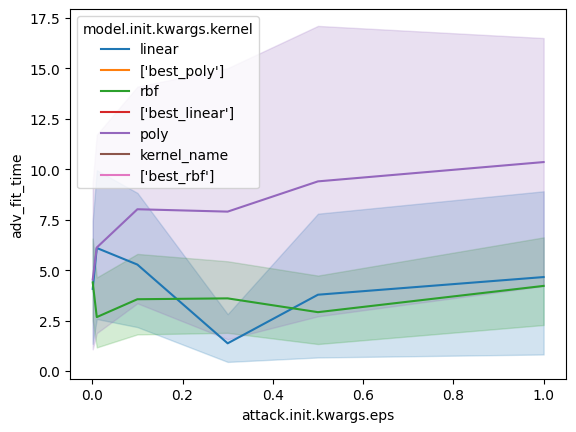

In [4]:
sns.lineplot(
    data=df,
    y="adv_fit_time",
    x="attack.init.kwargs.eps",
    hue="model.init.kwargs.kernel",
)

<Axes: xlabel='attack.init.kwargs.eps_step', ylabel='adv_fit_time'>

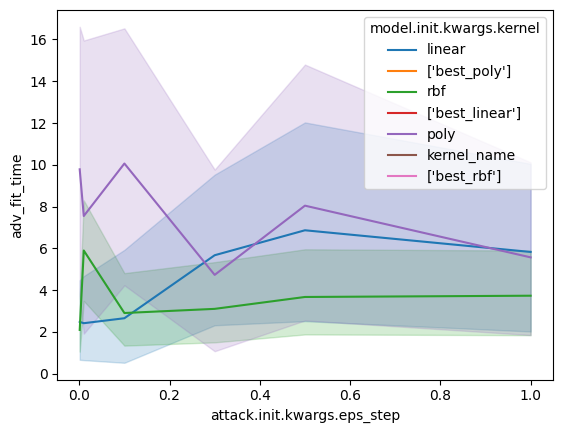

In [5]:
sns.lineplot(
    data=df,
    y="adv_fit_time",
    x="attack.init.kwargs.eps_step",
    hue="model.init.kwargs.kernel",
)

<Axes: xlabel='attack.init.kwargs.batch_size', ylabel='adv_fit_time'>

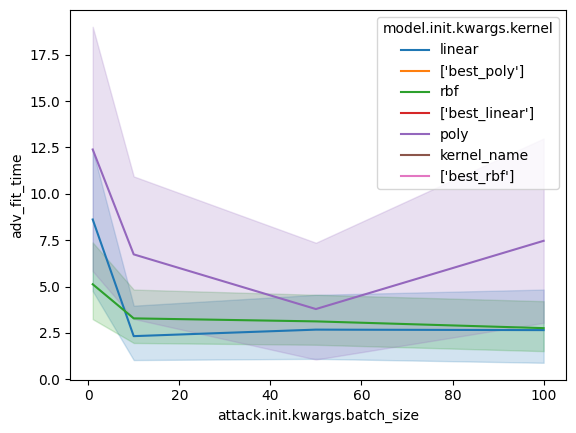

In [6]:
sns.lineplot(
    data=df,
    y="adv_fit_time",
    x="attack.init.kwargs.batch_size",
    hue="model.init.kwargs.kernel",
)